<a href="https://colab.research.google.com/github/Aaaron1995/ml_class2022/blob/main/class1017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification 流程

> 給予機器**固定選項**的學習方式，稱做「Classification」。

目標：產生一個有 *固定選項* 的判斷模型\
流程：
1. 載入資料
2. 轉換為矩陣型態(array)以便切割、運算
3. 將模型的題目與答案丟入決策樹演算法(DecisionTreeClassifier)當中
4. 可視化決策樹
5. 判斷模型精準度
---
將過去資料分為**訓練資料**與**驗證資料**。
1. 訓練資料會透過機器學習的演算法**產生模型**。
2. 而驗證資料用於**校正**演算法與**調整模型**。
---

# 載入資料

In [ ]:
!pip install scikit-learn

In [4]:
from sklearn.datasets import load_iris #載入範例模型
import pandas as pd

iris = load_iris()
db = pd.DataFrame(iris["data"], columns = iris["feature_names"]) #讀取資料為表格
db["ans"] = iris["target"]
db

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 將資料轉為矩陣

- 資料處理Data.Frame &rarr; pandas
- sklearn: array &rarr; numpy

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# drop為panda中的語法，可以對欄位進行切割
x = db.drop("ans", axis=1)
# DataFrame的資料轉化為array，利用train_test_split做矩陣切割
x = np.array(x)
y = np.array(db["ans"])
# [90% x, 10% x, 90% y, 10 % y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(pd.DataFrame(x_train, columns = iris["feature_names"]),"\n")
print(pd.DataFrame(x_test, columns = iris["feature_names"]))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  4.9               3.1                1.5               0.1
1                  5.4               3.4                1.7               0.2
2                  6.4               3.1                5.5               1.8
3                  6.8               3.2                5.9               2.3
4                  6.9               3.1                4.9               1.5
..                 ...               ...                ...               ...
130                6.4               3.2                5.3               2.3
131                4.5               2.3                1.3               0.3
132                5.6               2.9                3.6               1.3
133                5.1               2.5                3.0               1.1
134                6.0               3.4                4.5               1.6

[135 rows x 4 columns] 

    sepal length (cm)  sepal width (cm

In [ ]:
#分割出訓練資料與驗證資料，分割比例為9:1 or 8:2
from sklearn.model_selection import train_test_split

train_test_split(
    [1, 2, 3, 4],
    [5, 6, 7, 8,],
    [9, 10, 11, 12],
    test_size = 0.25
)

[[1, 4, 3], [2], [5, 8, 7], [6], [9, 12, 11], [10]]

In [9]:
#留意axis切欄=1切列=0
import pandas as pd
A = pd.DataFrame(
    [[1, 2],
    [3, 4]],
    columns = ["a", "b"],
    index = ["a", "b"]
)
B = A.drop("a",axis = 0)
C = A.drop("a",axis = 1)

print(A,"\n")
print(B,"\n")
print(C)

   a  b
a  1  2
b  3  4 

   a  b
b  3  4 

   b
a  2
b  4


# 建構模型
>使用sklearn.tree中的[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=2)#調整最大深度
dec.fit(x_train, y_train)#將訓練資料丟進DecisionTreeClassifier裡

DecisionTreeClassifier(max_depth=2)

#可視化模型
>使用sklearn.tree中的[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 135\nvalue = [45, 46, 44]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 46, 44]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica')]

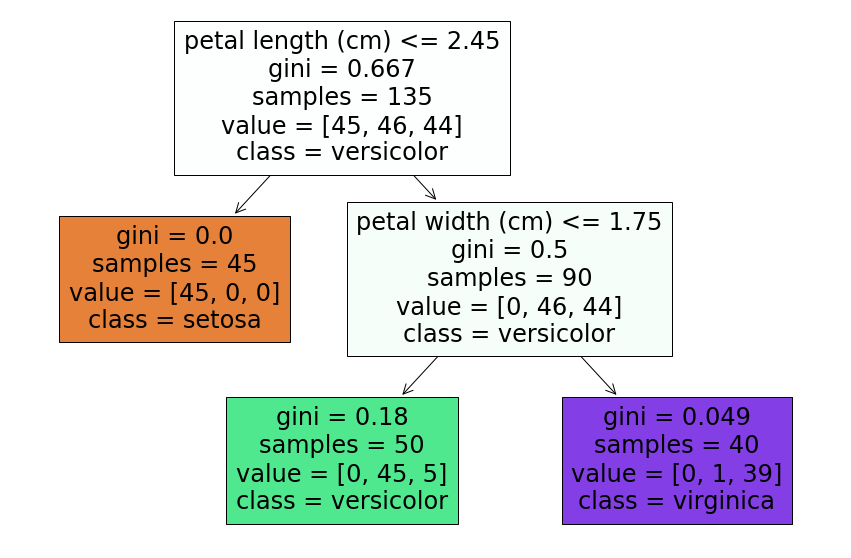

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 10))#設定圖框大小，置入決策圖
plot_tree(
    dec, 
    feature_names = iris["feature_names"], #將項目名稱放回框框中
    filled = True, #填入顏色
    class_names = iris["target_names"] #將答案丟進去
)

> 決策樹是**左T右F**


通過不同的決策將*gini吉尼係數*降至**最低** 

吉尼係數0.0=猜錯機率0%

$Gini = p_1(1-p_1)+p_2(1-p_2)+...+p_n(1-p_n)\\
=p_1-p_1^2+p_2-p_2^2+...+p_n-p_n^2=(p_1+p_2+...+p_n)-(p_1^2+p_2^2+...+p_n^2)\\
=1-\displaystyle\sum^{n}_{i=1}{p_i^2}$

---

#避免完美訓練 
又稱過擬合 **Overfitting** \\
將現實資料吃透，不斷訓練是沒有幫助的

&rarr; 前剪枝，設定條件

&rarr; 後剪枝

#測試模型精準度

In [8]:
#測試模型dec準確度
from sklearn.metrics import accuracy_score
#predict為預測()變數的答案
accuracy_score(y_test, dec.predict(x_test))
#accuracy準確性

1.0

統計資料量需求：
**ML**：一千以上
**DL**：一萬以上

**資料量多寡 -> 問題難度** 欄位數目掛勾